![picture](https://drive.google.com/uc?id=1j8cwDcusQZUCjmFTj7aTmj7HVxWGo5X5)

# Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

# Data Collection and EDA

In [ ]:
#Importing Boston House Price Datasets

#house_price_dataset = sklearn.datasets.load_boston() -> removed from directory

In [ ]:
#from sklearn.datasets import fetch_openml
#housing = fetch_openml(name="house_prices", as_frame=True)

In [ ]:
#print(housing)

In [ ]:
# Loading the dataset to a Pandas DataFrame

#house_price_df = pd.DataFrame(housing.data)

house_price_df = pd.read_csv('/content/drive/MyDrive/ML Projects Workflow/Housing.csv')

In [ ]:
house_price_df.head() # top 5 rows

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
house_price_df.columns # names of the columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
house_price_df.shape  #shape of the dataset

(545, 13)

In [ ]:
house_price_df.info()   #basic information of the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
house_price_df.describe(include='object')  #descriptive stats for categorical features

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


In [ ]:
house_price_df.describe(include=['int64','float64'])  #descriptive stats for the numerical features

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
house_price_df.nunique() #Number of unique values for each features.

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [ ]:
house_price_df.isnull().sum()  # missing values in any features

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
house_price_df.duplicated().sum() # duplicate values check

0

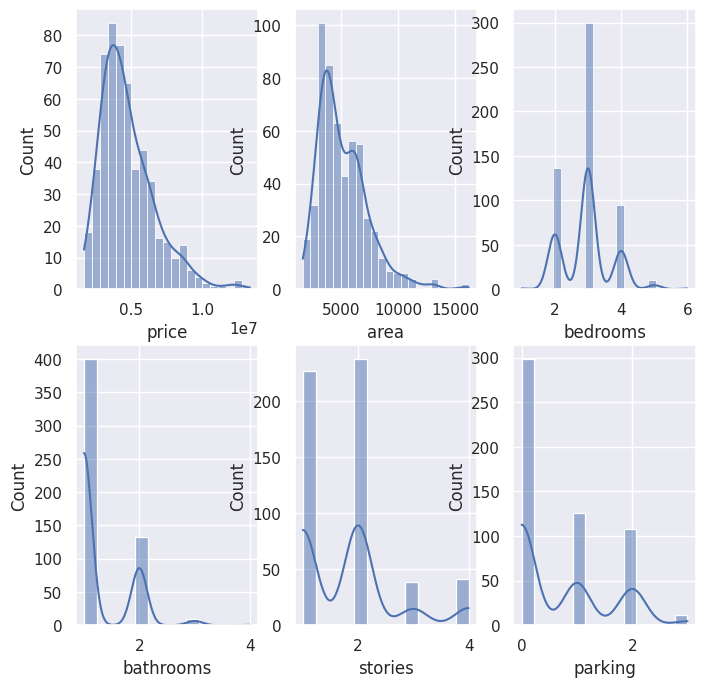

In [ ]:
#Hist Plot:
plt.figure(figsize=(8,8))
for i,col in enumerate(['price','area','bedrooms','bathrooms','stories','parking']):
  plt.subplot(2,3,i+1)
  sns.histplot(data=house_price_df, x=col, kde=True)

plt.show()

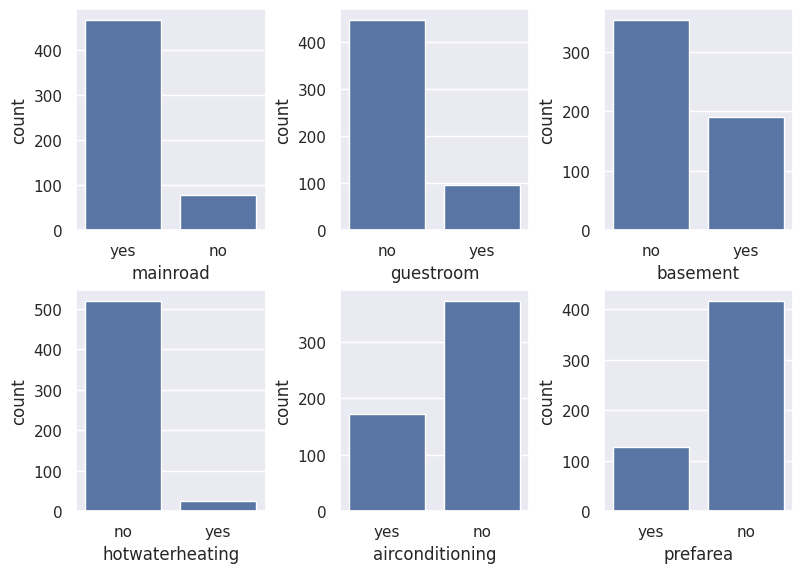

In [ ]:
#Count Plot:
plt.figure(figsize=(8,8))
for i,col in enumerate(['mainroad','guestroom', 'basement','hotwaterheating','airconditioning',
                        'prefarea']):
  plt.subplot(3,3,i+1)
  sns.countplot(data=house_price_df, x=col)

plt.tight_layout(pad=0.5)
plt.show()

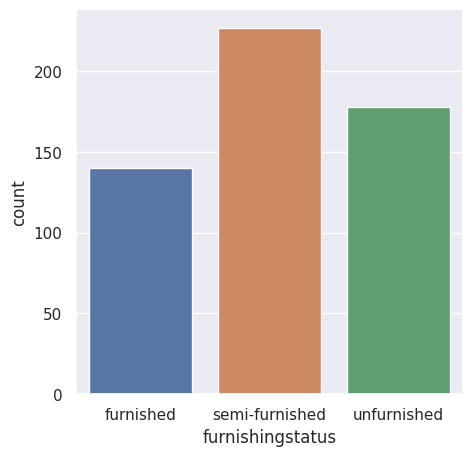

In [ ]:
#Bar-plot:
plt.figure(figsize=(5,5))
sns.countplot(data=house_price_df, x='furnishingstatus', hue='furnishingstatus')
plt.show()

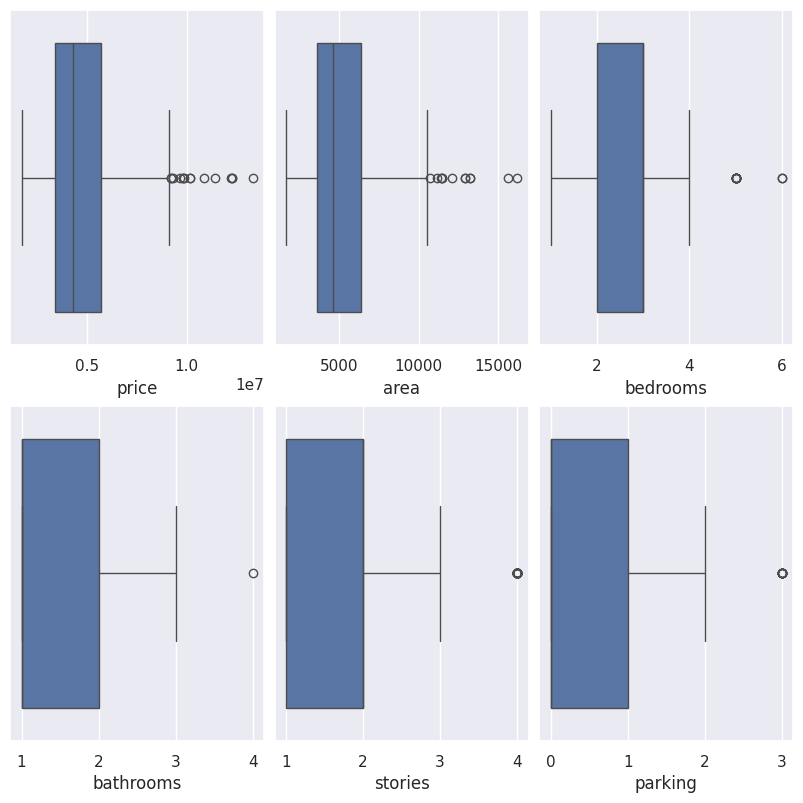

In [ ]:
#Outlier Detection:
plt.figure(figsize=(8,8))
for i,col in enumerate(['price','area','bedrooms','bathrooms','stories','parking']):
  plt.subplot(2,3,i+1)
  sns.boxplot(data=house_price_df, x=col)

plt.tight_layout(pad=0.5)
plt.show()

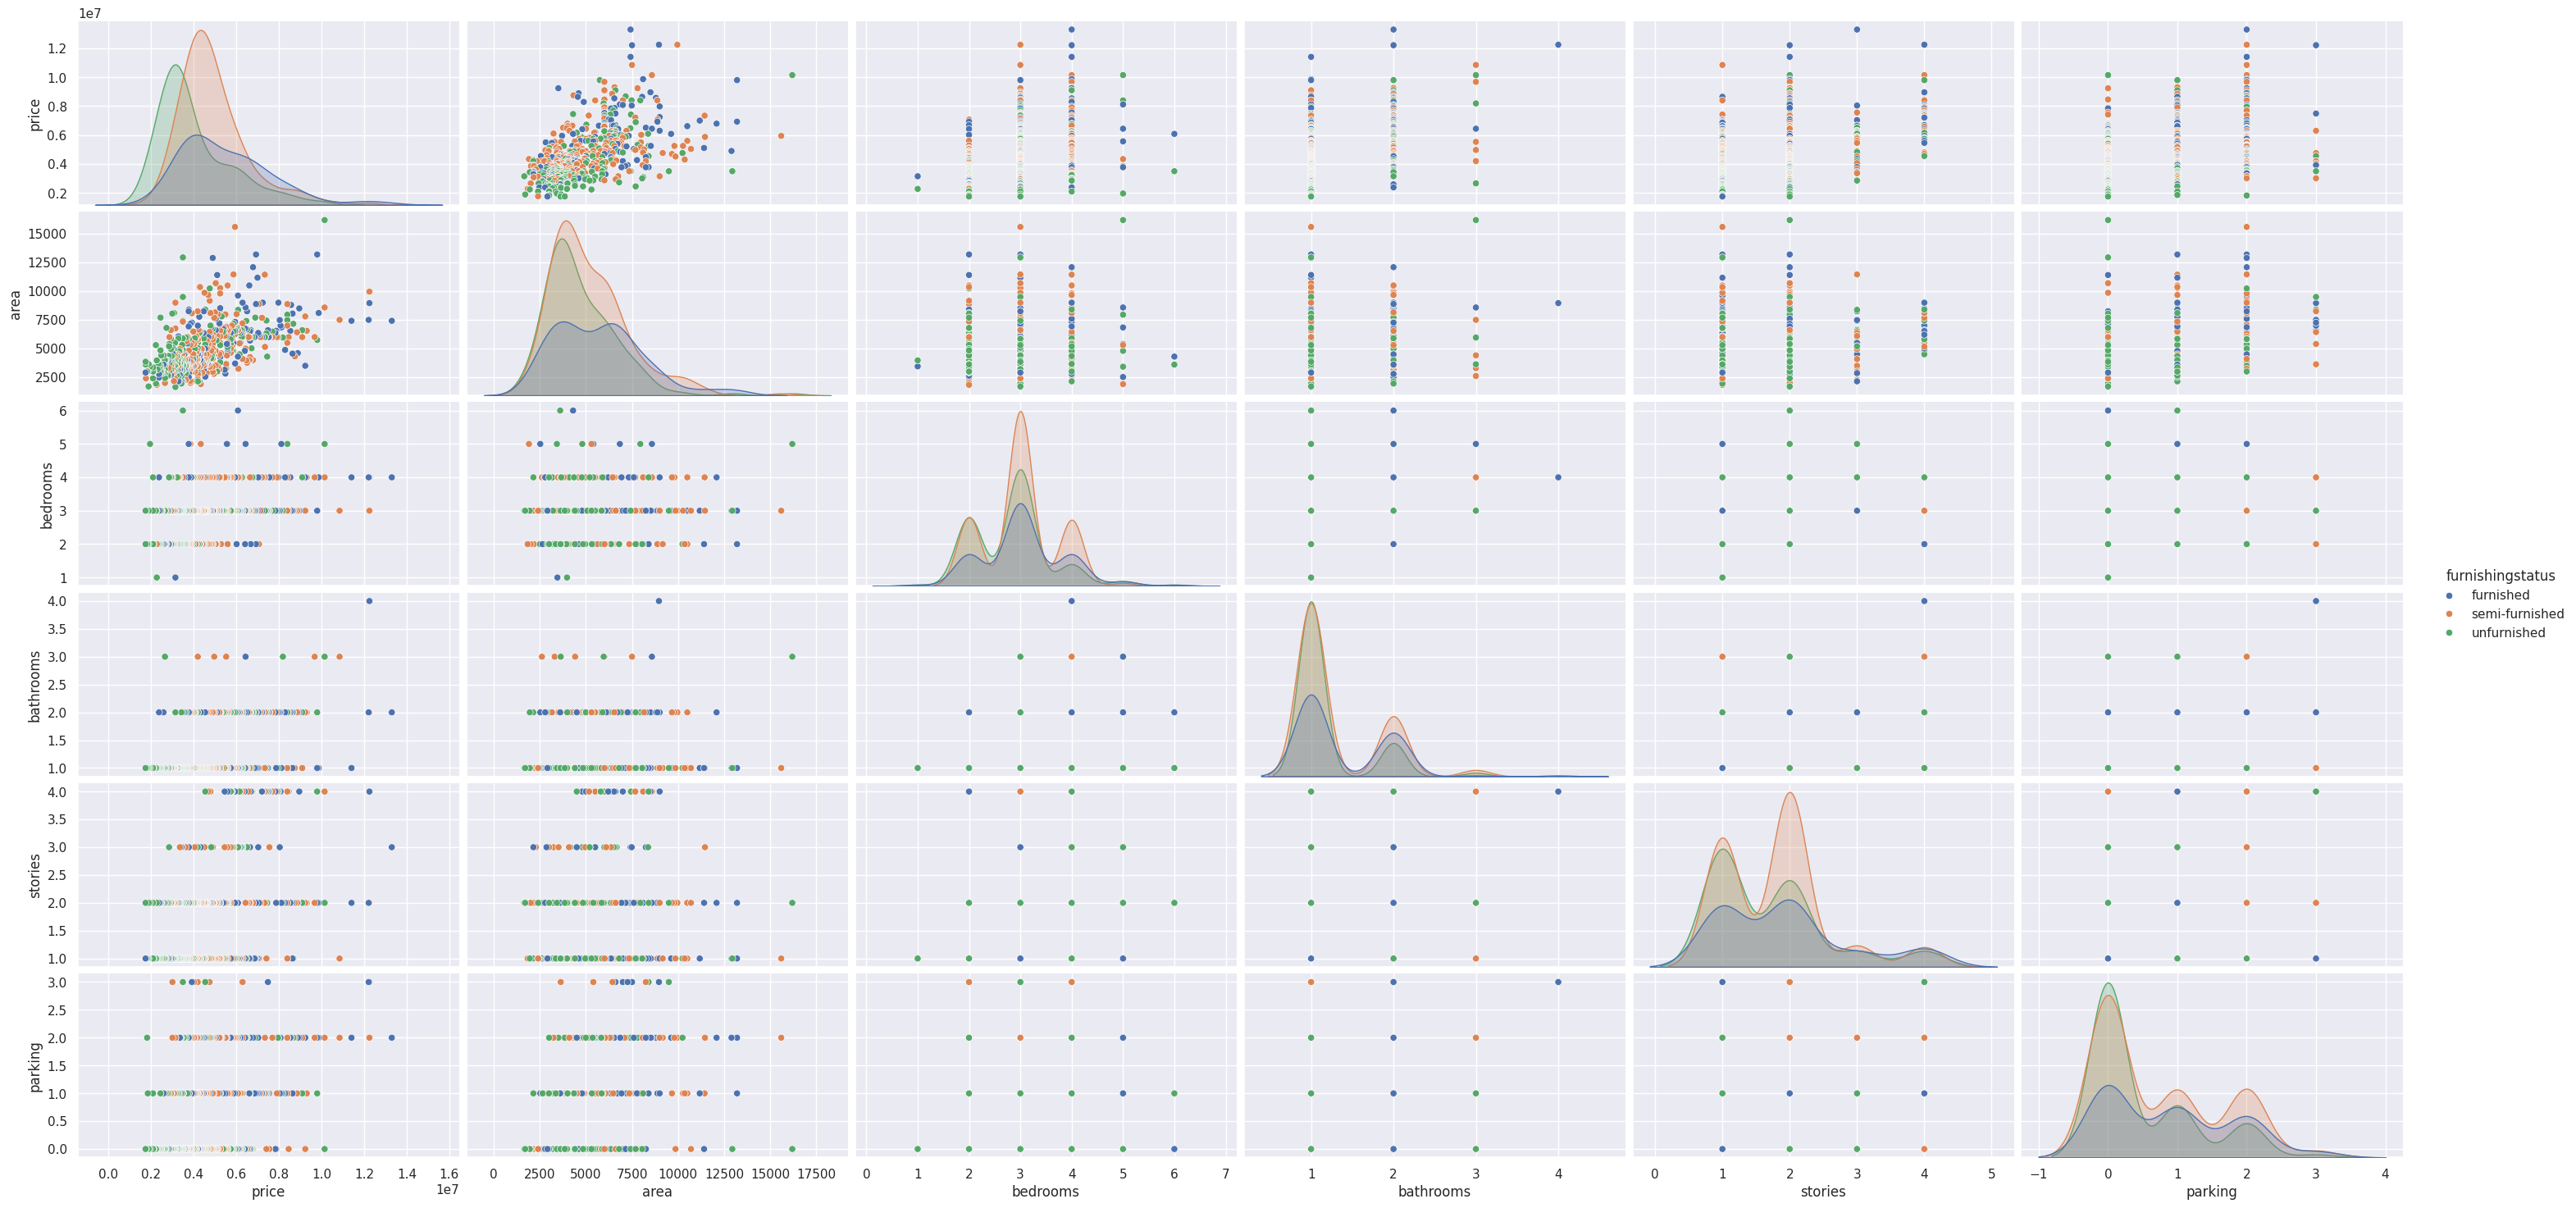

In [ ]:
# Create Pair-Plots to visualize the distribution and relationship between the features.

vars=['price','area','bedrooms','bathrooms','stories','parking'] #avoid using the categorical features

sns.pairplot(data=house_price_df,
             height= 2.5,
             aspect=2,
             vars=vars,
             hue='furnishingstatus',
             kind='scatter',
             diag_kind='kde',
             dropna=True)

plt.show()

<ipython-input-217-d87eff650f09>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(house_price_df.corr(),square=True,cbar=True, vmin=-1, center=0, annot=True, cmap='RdBu_r')


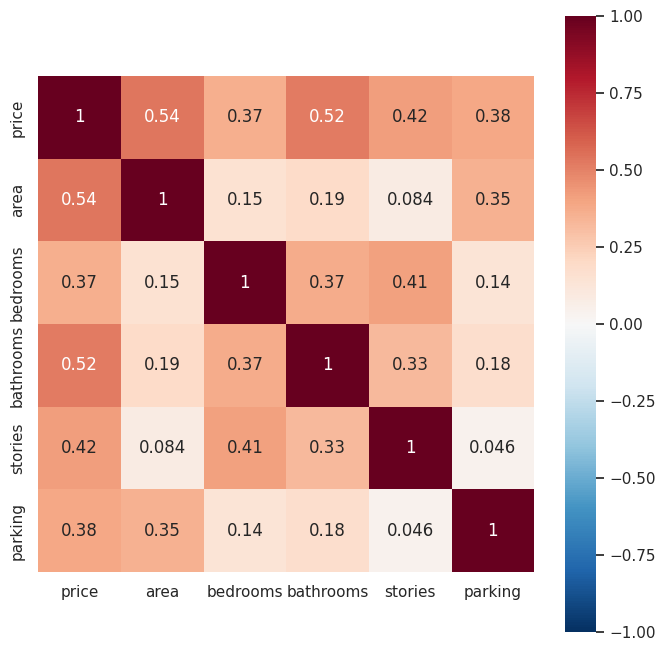

In [ ]:
# create the heatmap to see the correlation between different features.
plt.figure(figsize=(8,8))
sns.heatmap(house_price_df.corr(),square=True,cbar=True, vmin=-1, center=0, annot=True, cmap='RdBu_r')
plt.show()

# Feature Engineering : Handle categorical data using one hot encoding.

In [ ]:
encoded_df = pd.get_dummies(house_price_df[['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']], drop_first = True)
encoded_house_price_df = pd.concat([house_price_df, encoded_df], axis = 1)
encoded_house_price_df.drop(['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'], axis = 1, inplace = True)

encoded_house_price_df.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,13300000,7420,4,2,3,2,0,0,1,0,0,0,1,1
1,12250000,8960,4,4,4,3,0,0,1,0,0,0,1,0
2,12250000,9960,3,2,2,2,1,0,1,0,1,0,0,1
3,12215000,7500,4,2,2,3,0,0,1,0,1,0,1,1
4,11410000,7420,4,1,2,2,0,0,1,1,1,0,1,0


In [ ]:
encoded_house_price_df.columns #name of the features

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes'],
      dtype='object')

In [ ]:
encoded_house_price_df.shape[1] #number of the features

14

# Dividing the data into X & y :

In [ ]:
#separating the data and labels
X = encoded_house_price_df.drop(columns='price', axis=1)
y = encoded_house_price_df['price']

# Feature Scaling & Normalizing:

In [ ]:
X.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes'],
      dtype='object')

In [ ]:
#It's considered a good practice to standardize data before spliting ,but may cause data leakage.
scaler = MinMaxScaler()
scaler.fit(X)
scaled_house_price_array = scaler.transform(X)
scaled_house_price_df = pd.DataFrame(scaled_house_price_array, columns=X.columns)

In [ ]:
X = scaled_house_price_df
y = encoded_house_price_df['price']

In [ ]:
X.head()

,area,bedrooms,bathrooms,stories,parking,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,0.396564,0.6,0.333333,0.666667,0.666667,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,0.502405,0.6,1.000000,1.000000,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.571134,0.4,0.333333,0.333333,0.666667,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.402062,0.6,0.333333,0.333333,1.000000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
4,0.396564,0.6,0.000000,0.333333,0.666667,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0


In [ ]:
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

# Train Test Split:

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=1)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)

In [ ]:
print(X.shape, X_train.shape, X_valid.shape, X_test.shape)

(545, 13) (436, 13) (54, 13) (55, 13)


# Model Training: XGBoost Regressor

In [ ]:
model = XGBRegressor()

In [ ]:
model = XGBRegressor(objective="reg:squarederror", n_estimators=10, random_state=0)
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

# Model Evaluation Metrics

# R2 Score:

- The R2 score ranges from 0 to 1, with 1 indicating a perfect fit.

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
# r2_score on the training data
X_train_pred = model.predict(X_train)
training_r2_score = r2_score(X_train_pred, y_train)

print('R2_score on training data: {}%'.format(round((training_r2_score*100),2)))

R2_score on training data: 87.19%


In [ ]:
# r2_score on the training data
X_valid_pred = model.predict(X_valid)
validation_r2_score = r2_score(X_valid_pred, y_valid)

print('R2_score on validation data: {}%'.format(round((validation_r2_score*100),2)))

R2_score on validation data: 84.78%


In [ ]:
# r2_score on the training data
X_test_pred = model.predict(X_test)
test_r2_score = r2_score(X_test_pred, y_test)

print('R2_score on test data: {}%'.format(round((test_r2_score*100),2)))

R2_score on test data: 92.19%


# Mean Absolute Error:

- This metric measures the average absolute difference between the predicted values and the actual values.

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
training_mae = mean_absolute_error(X_train_pred,y_train)
print('MAE on training data: {}'.format(training_mae))

MAE on training data: 416641.6467889908


In [ ]:
validation_mae = mean_absolute_error(X_valid_pred,y_valid)
print('MAE on validation data: {}'.format(validation_mae))

MAE on validation data: 438799.89351851854


In [ ]:
test_mae = mean_absolute_error(X_test_pred,y_test)
print('MAE on test data: {}'.format(test_mae))

MAE on test data: 373589.69545454544


# Visualizing Actual Prices & Predicted Prices:

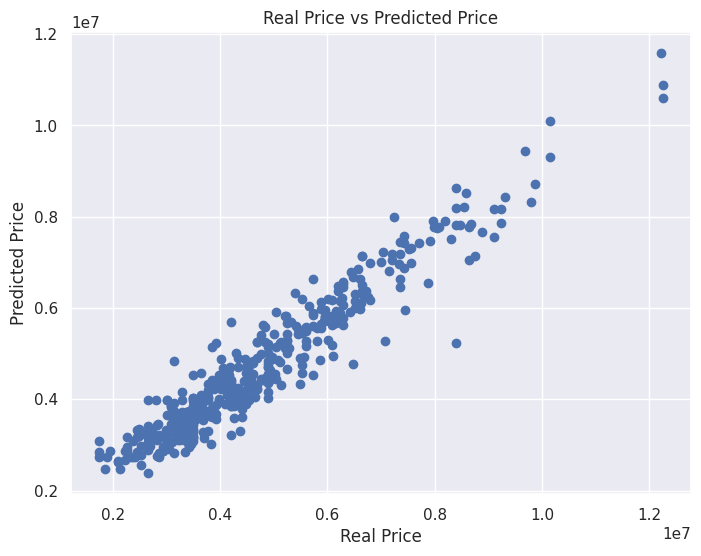

In [ ]:
# Create a scatter plot with the real price on the x-axis and the predicted price on the y-axis.
plt.figure(figsize=(8,6))
plt.scatter(y_train, X_train_pred)

# Add labels and title.
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')
plt.title('Real Price vs Predicted Price')

# Show the plot.
plt.show()